# IMEC2201 Herramientas Computacionales 
## Semana 4: Raíces de Ecuaciones
### Clase 7-8:  Factor de Fricción de Darcy y Raíces

Universidad de los Andes — Abril 27, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Factor de Fricción de Darcy [→](#section1)
- 1.1. Introducción
- 1.2. Número de Reynolds
- 1.3. Coeficiente de Fricción
- 1.4. Flujo Laminar
- 1.5. Flujo Turbulento
- 1.6. Diagrama de Moody
- 1.7. Ejemplo
    - 1.7.1. Paso 1. Determinar el Número de Reynolds ($Re$)
    - 1.7.2. Paso 2. Determinar la Rugosidad Relativa ($\varepsilon_r$)
    - 1.7.3. Paso 3. Determinar el Coeficiente de Fricción de Darcy ($f$)
    - 1.7.3. Paso 4. Determinar la Pérdida de Carga ($h_f$)

### Sección 2: Raíces [→](#section2)
- 2.1. Introducción
- 2.2. Cargar Librerías
- 2.3. Ecuaciones No Lineales
- 2.4. Aplicación con `Roots.jl`
- 2.5. Aplicación con `NLsolve.jl`
- 2.6. Factor de Fricción de Darcy con Librerías
    - 2.6.1. Empleando `Roots.jl`
    - 2.6.2. Empleando `NLsolve.jl`
___

**¡Importante!** Note que la carpeta **week4** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week4**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week4) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week4`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week4`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week4/Project.toml`
  [2774e3e8] NLsolve v4.5.1
  [91a5bcdd] Plots v1.27.6
  [f2b01f46] Roots v2.0.0


<a id="section1"></a>
# Sección 1: Factor de Fricción de Darcy

## 1.1. Introducción

Esta semana consideramos la siguiente pregunta:

> Dada una tubería cilíndrica y componentes adicionales como válvulas, codos y difusores, más el caudal de diseño (dado por la bomba centrífuga que vimos la semana anterior) y las propiedades del fluido, ¿qué diferencia de presiones se necesita para producir el flujo?


Notemos una relación importante: **diferencia de presión** a causa del **flujo en un conducto**. Algunas variables que están presentes son:
- Rugosidad de la pared.
- Número de Reynolds que indica el tipo de flujo (laminar o turbulento).
- Caudal.

## 1.2. Número de Reynolds

Relación entre las *fuerzas de inercia* y las *fuerzas viscosas* de un fluido que permiten determinar si el flujo es laminar o turbulento.

$$
Re = \frac{\rho V D}{\mu} = \frac{V D}{\nu}
$$

Siendo $\rho$ la densidad del fluido, $V$ la velocidad de flujo, $D$ el diámetro interno de la tubería, $\mu$ la viscosidad dinámica del fluido y $\nu$ la viscosidad cinemática del fluido.

Típicamente:
- Flujo laminar cuando $Re <= 2300$
- Flujo turbulento cuando $Re > 2300$

Además, el flujo turbulento es más común que el laminar.

<img src='./img/flows.gif' width='350' height='350' />

## 1.3. Coeficiente de Fricción

La fricción dada por las paredes del conducto causan una pérdida de carga $h_f$.

$$
h_f = f \frac{L}{D} \frac{V^2}{2g}
$$

Siendo $f$ el **coeficiente de fricción de Darcy** y $g$ la gravedad.

En general, el coeficiente de fricción de Darcy es función de $Re$ y la rugosidad de la pared $\varepsilon$.

También, recordemos que:

$$
Q = VA
$$

y

$$
A = \frac{\pi D^2}{4}
$$

Siendo $A$ el área transversal de la tubería.

## 1.4. Flujo Laminar

Recordemos que el flujo dentro de una tubería es *laminar* cuando $Re <= 2300$. Para este caso, el coeficiente de fricción de Darcy es:

$$
f = \frac{64}{Re}
$$

**Nota:** La derivación de esta relación se presenta en la Sección 6.4 de la lectura White - Mecánica de Fluidos (Ch. 6) en la carpeta Enlaces de Interés.

## 1.5. Flujo Turbulento

Recordemos que el flujo dentro de una tubería es *turbulento* cuando $Re > 2300$. Para este caso, el coeficiente de fricción de Darcy es:

$$
\frac{1}{\sqrt{f}} = -2 \: \text{log} \left( \frac{\varepsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right)
$$

Esta ecuación es también conocida como la *ecuación de Colebrook*.

**Nota:** La derivación de esta relación se presenta en la Sección 6.6 de la lectura White - Mecánica de Fluidos (Ch. 6) en la carpeta Enlaces de Interés.

## 1.6. Diagrama de Moody

Aquí surge el concepto de *rugosidad relativa*, lo cual es la relación $\varepsilon / D$.

<img src='./img/moody2.png' width='800' height='800' />

## 1.7. Ejemplo

Calcule la pérdida de carga $h_f$ en un tubo horizontal de 6 in de diámetro  ($D$) y 200 ft ($L$) de longitud de hierro fundido asfáltico, por el que circula agua a una velocidad media de 6 ft/s ($V$). Considere $\rho = 1.94 \: slug/ft^3$, $\mu = 2.09 · 10^{-5} \: slug/ft·s$ y $\varepsilon / D$. Tomar $\varepsilon = 0.0004\text{ ft}$.

In [3]:
# Definimos las variables
D = 6/12 # ft
L = 200 # ft
V = 6.0 # ft/s
ρ = 1.94 # slug/ft3
μ = 2.09e-5 # slug/ft·s
ε = 0.0004 # ft

0.0004

### 1.7.1. Paso 1. Determinar el Número de Reynolds ($Re$)

$$
Re = \frac{\rho V D}{\mu}
$$

In [4]:
function reynolds(densidad, velocidad, diametro, viscosidad)
    _Re = densidad*velocidad*diametro / viscosidad # Juan Sabogal
    return round(_Re, digits=2)
end    

Re = reynolds(ρ, V, D, μ)
    
Re

278468.9

### 1.7.2. Paso 2. Determinar la Rugosidad Relativa ($\varepsilon_{r}$)

In [5]:
εᵣ = ε / D
εᵣ

0.0008

### 1.7.3. Paso 3. Determinar el Coeficiente de Fricción de Darcy ($f$)

Este paso puede realizarse de dos formas:
1. Analíticamente mediante iteraciones hasta alcanzar una convergencia.
2. Diagrama de Moody.

Para el primer método, asumimos un valor de $f$ inicial para luego comparar las dos partes de la igualdad. El valor de $f$ correcto será el que converja según el valor estipulado manualmente de umbral. Reordenando un poco:

$$
\frac{1}{\sqrt{f}} = -2 \: \text{log} \left( \frac{\varepsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right)
$$

$$
\frac{1}{f} = \left[ -2 \: \text{log} \left( \frac{\varepsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right) \right]^2
$$

$$
f = \frac{1}{\left[ -2 \: \text{log} \left( \frac{\varepsilon / D}{3.7} + \frac{2.51}{Re \sqrt{f}} \right) \right]^2}
$$

Con la segunda opción, el coeficiente de fricción de Darcy (~0.02) se determina así:

<img src='./img/moody_e1.png' width='800' height='800' />

**Nota:** Más información del método iterativo [aquí](https://www.youtube.com/watch?v=7LBmd4rqKGE).

In [6]:
# Lado Derecho Igualdad
function factor_friccion(rug_relativa, reynolds, coef_friccion)
    _ff = 1 / (-2 * log10( rug_relativa/3.7 + 2.51/(reynolds * sqrt(coef_friccion))))^2
    return round(_ff, digits=6)
end


factor_friccion (generic function with 1 method)

In [7]:
# While Loop
criterio_convergencia = 0.005

dif = 100
f_iter = 0.01
f_estimado = 0

i = 1
while dif > criterio_convergencia
    f_estimado = factor_friccion(εᵣ, Re, f_iter)
    dif = round(abs(f_estimado - f_iter), digits=6)
    
    println("Iter $(i): $(f_iter) - Estimado: $(f_estimado) - Dif: $(dif)")
    
    f_iter += 0.005
    i += 1
end

f_estimado

Iter 1: 0.01 - Estimado: 0.020248 - Dif: 0.010248
Iter 2: 0.015 - Estimado: 0.019973 - Dif: 0.004973


0.019973

In [8]:
# For Loop
f = 0
for cf in 0.01:0.005:0.03 # cf es el coeficiente de fricción
    f_estimado = factor_friccion(εᵣ, Re, cf)
    
    dif = abs(f_estimado - cf)
    
    println("Iter: $(cf) - Estimado: $(f_estimado) - Dif: $(dif)")
    
    if dif <= criterio_convergencia
        f = cf
    else
        continue
    end
end

f_estimado

Iter: 0.01 - Estimado: 0.020248 - Dif: 0.010247999999999998
Iter: 0.015 - Estimado: 0.019973 - Dif: 0.004973000000000002
Iter: 0.02 - Estimado: 0.019805 - Dif: 0.00019500000000000073
Iter: 0.025 - Estimado: 0.019688 - Dif: 0.005312000000000001
Iter: 0.03 - Estimado: 0.0196 - Dif: 0.0104


0.0196

### 1.7.3. Paso 4. Determinar la Pérdida de Carga ($h_f$)

Recordemos la relación:

$$
h_f = f \frac{L}{D} \frac{V^2}{2g}
$$

In [9]:
function perdida_carga(coef_friccion, long, dia, vel)
   _hf = coef_friccion * (long/dia) * ((vel^2)/(2*32.2))
   return  round(_hf, digits=2)
end

hf = perdida_carga(f_estimado, L, D, V)
hf

4.38

<a id="section2"></a>
# Sección 2: Raíces

## 2.1. Introducción

Determinar las *raíces* (soluciones) de una ecuación hace referencia a calcular los valores de $x$ que cumplen $f(x) = 0$.

Dependiendo de la función $f(x)$ con la que estemos trabajando, la determinación de las raíces puede llegar a ser complejo y laborioso si se realiza a mano. Por lo tanto, una solución efectiva es optar por métodos numéricos que computacionalmente son provechosos.

Los métodos numéricos más utilizados son:
- Newton-Raphson
- Bisección
- Trisección
- Secante
- Matriz por vector (más adelante lo veremos)
- Gauss-Jordan
- Falsa Posición

El desarrollo manual de estos métodos los encuentran en Bloque Neón > Contenido > Semana 4 > Enlaces de Interés.

Aquí veremos cómo sacarle provecho a los desarrollos realizados con las librerías `Roots.jl` y `NLsolve.jl`.

## 2.2. Cargar Librerías

In [10]:
using Plots
using Roots
using NLsolve

## 2.3. Ecuaciones No Lineales

Una **ecuación lineal** es aquella que involucra una o más variables de primer grado (es decir, a la primera potencia) y no contiene productos entre las variables. Entonces:

> Una ecuación lineal es aquella que involucra solamente sumas y restas de una variable a la primera potencia.

Un ejemplo de una ecuación no lineal y su solución, es el caso conocido de dela *fórmula cuadrática*:

Para la ecuación:
$$
ax^2 + bx + c = 0
$$

La solución (*fórmula cuadrática*) es:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

Utilizando números, tenemos lo siguiente:

$$
x^2 - 7x + 12 = 0
$$

Entonces: $a$ = 1, $b = -7$ y $c = 12$. Luego:

$$
x = \frac{-(-7) \pm \sqrt{(-7)^2 - (1)(12)}}{2(1)} = \frac{7 \pm 1}{2}
$$

Finalmente, obtenemos dos soluciones: $x = 4$ y $x = 3$.

In [11]:
# Fórmula Cuadrática
function cuadratica(a, b, c)
    sol_suma = (-b + sqrt(b^2 - 4a*c)) / (2a)
    sol_resta = (-b - sqrt(b^2 - 4a*c)) / (2a) # Juan Sabogal

    return [sol_suma, sol_resta]
end

# Ejemplo
ejm1 = cuadratica(1, -7, 12)
ejm1

2-element Vector{Float64}:
 4.0
 3.0

Entendido. ¿Pero qué pasa si la ecuación es más compleja de trabajar? 

Por ejemplo:

$$
e^x - x^4 = 0
$$

Dado que manualmente es más dispendioso, saquémosle provecho a las librerías `Roots.jl` y `NLsolve.jl`.

## 2.4. Aplicación con `Roots.jl`

Vamos a distinguir la **sintaxis** de la librería `Roots.jl` para dar solución a estos ejercicios.

Para empezar, comentar que disponemos de los métodos comentados en la Sección 2.1. Según el tipo de método, podemos tener dos sintaxis principales:

**1. Métodos Entre Intervalo**
Para algunos casos, sabemos que la raíz ($f(x) = 0$) se encuentra contenida en un intervalo $[a, b]$; típicamente esto lo conocemos porque graficamos la función $f(x)$. Aquí, la sintaxis es:

```julia
# Paso 1. Importar librería
using Roots

# Paso 2. Definir la función
f(x) = exp(x) - x^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero

# Paso 3. Emplear el solucionador 'find_zero()'
solucion = find_zero(f, (a,b), Bisection()) # Sintaxis: 1. Función, 2. Intervalo, 3. Método
```

**Nota:** Más información de la librería `Roots.jl` [aquí](https://github.com/JuliaMath/Roots.jl) y [aquí](https://docs.juliahub.com/Roots/o0Xsi/2.0.0/).

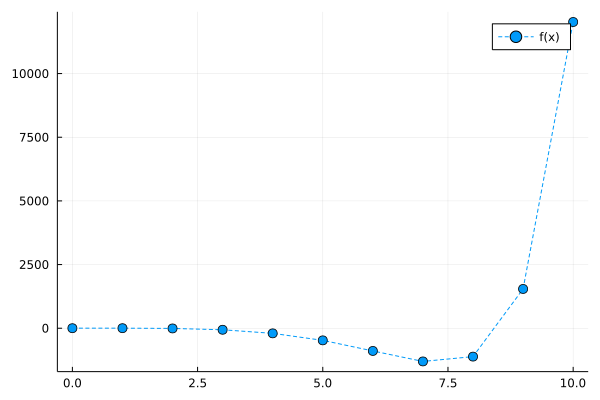

In [12]:
# Paso 1. Importar librería
using Plots
using Roots

# Paso 2. Definir la función
f2(x) = exp(x) - x^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero

# Observemos el comportamiento para definir el intervalo
plot(0:1:10, f2, seriestype=:line, ls=:dash, w=1, m=:circle, ms=5, label="f(x)", legend=true)

In [13]:
# Paso 3. Emplear el solucionador 'find_zero()'
a = 7.5
b = 10

solucion = find_zero(f2, (a,b), Bisection()) # Sintaxis: 1. Función, 2. Intervalo, 3. Método
solucion

8.6131694564414

**2. Métodos de Posición Inicial**
A diferencia del primer método, solo debemos definir el punto inicial en el que el método numérico empezará a iterar hasta la convergencia. Aquí, la sintaxis es:

```julia
# Paso 1. Importar librería
using Roots

# Paso 2. Definir la función
f(x) = exp(x) - x^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero

# Paso 3. Emplear el solucionador 'find_zero()'
solucion = find_zero(f, a, Order1()) # Sintaxis: 1. Función, 2. Punto Inicial, 3. Método (Order1() es el Método de la Secante)
```

In [14]:
a = 3
solucion = find_zero(f2, a, Order1()) # Sintaxis: 1. Función, 2. Intervalo, 3. Método
solucion

1.4296118247255556

**3. Múltiples Raíces**
Si sabemos que la función a la que le queremos encontrar las raíces tiene varias soluciones, debemos utilizar la siguiente sintaxis:

```julia
# Paso 1. Importar librería
using Roots

# Paso 2. Definir la función
f(x) = exp(x) - x^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero

# Paso 3. Emplear el solucionador 'find_zero()'
solucion = find_zeros(f, a, b) # Sintaxis: 1. Función, 2. Punto Inicial Intervalo, 3. Punto Final Intervalo
```

**Importante:** Note que esta vez utilizamos `find_zeros()` en lugar de `find_zero()`.

In [15]:
a = -10
b = 10

raices = find_zeros(f2, a, b)
raices

3-element Vector{Float64}:
 -0.8155534188089606
  1.4296118247255556
  8.613169456441398

## 2.5. Aplicación con `NLsolve.jl`

Vamos a distinguir la **sintaxis** de la librería `NLsolve.jl` para dar solución a estos ejercicios.

Para empezar, veamos que, con sintaxis diferente (y seguramente diferente desarrollo del algoritmo), obtenemos soluciones aproximadas (quizá no la misma por lo que los métodos numéricos son iterativos).

Para `NLsolve.jl` tenemos:

```julia
# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir la función
function f!(F, x) # Importante poner un "!" al final del nombre de la función 
    F[1] = exp(x[1]) - x[1]^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [a]) # Sintaxis: 1. Función, 2. [Punto Inicial]

# Paso 4. Llamar la solución directamente
solucion.zero
```

Fíjense que el parámetro de punto inicial está entre corchetes `[]`, es decir, es un Array. ¿Por qué? Note que en la función `f!`, la variable la llamamos como entradas del Array (es decir, `x[1]`).

La ventaja de esta librería es que podemos utilizar un sistema de ecuaciones; eso lo veremos en la Semana 5.

**Nota:** Más información de la librería `NLsolve.jl` [aquí](https://github.com/JuliaNLSolvers/NLsolve.jl) y [aquí](https://morioh.com/p/367a415c21db).

In [16]:
# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir la función
function f3!(F, x) # Importante poner un "!" al final del nombre de la función 
    F[1] = exp(x[1]) - x[1]^4 # **Importante:** Notemos que la ecuación debe estar igualada a cero
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f3!, [7.5]) # Sintaxis: 1. Función, 2. [Punto Inicial]

# Paso 4. Llamar la solución directamente
solucion.zero

1-element Vector{Float64}:
 8.613169456441463

## 2.6. Factor de Fricción de Darcy con Librerías

### 2.6.1. Empleando `Roots.jl`

In [17]:
# Disponible después de entregar Taller 4

### 2.6.2. Empleando `NLsolve.jl`

In [18]:
# Disponible después de entregar Taller 4